<h1 style="background-color:#0071BD;color:white;text-align:center;padding-top:0.8em;padding-bottom: 0.8em">
Word Embeddings - A Numeric Building Block of Natural Language Processing 
</h1>



<p style="background-color:#66A5D1;padding-top:0.2em;padding-bottom: 0.2em" />

# Description of this notebook

Words can be represented by Vectors, so that co-occurrence relations among words in the corpus can be approximated 
through nummeric measurements, such as the cosine similarity, of their vector representations. 

In this notebook, we use `gensim` package to describe basic operations of word-embeddings. `Gensim` is a python package for topic modeling (LDA) in Natural Language Processing, and also provides a number of useful tools, such as word-embeddings. 

We first import `Word2Vec` from `gensim` as follows.

In [1]:
from gensim.models import Word2Vec

`Word2Vec` provides an easy-to-use interface to use `NLTK` corpora (Natural Language Toolkit). We import its movie review corpora and Brown corpoa. 

In [2]:
from nltk.corpus import movie_reviews, brown

Word Vectors representing word co-occurrence relations in movie reviews are easily imported by one Python line

In [3]:
reviewVec = Word2Vec(movie_reviews.sents())

The top 10 most similar words of `way` in the movie review corpora are listed as follows.

In [4]:
reviewVec.wv.most_similar('way', topn=10)

[('situation', 0.7207054495811462),
 ('stuff', 0.6776666641235352),
 ('material', 0.6655994653701782),
 ('audience', 0.661513090133667),
 ('money', 0.6551351547241211),
 ('viewer', 0.6523748636245728),
 ('thing', 0.6413513422012329),
 ('place', 0.6360496282577515),
 ('it', 0.6343892216682434),
 ('mind', 0.6280417442321777)]

We can compare the results of using Brown corpora.

In [5]:
brownVec = Word2Vec(brown.sents())

In [6]:
brownVec.wv.most_similar('way', topn=10)

[('place', 0.9379965662956238),
 ('best', 0.8730759620666504),
 ('work', 0.8706508874893188),
 ('job', 0.8640382289886475),
 ('mind', 0.8639699220657349),
 ('money', 0.844369113445282),
 ('world', 0.8245671987533569),
 ('trouble', 0.8233507871627808),
 ('show', 0.8204176425933838),
 ('play', 0.8203293681144714)]

Co-occurrence relations are determined (or biased) by the corpora. We can compare the results of using Brown corpora.

In [7]:
reviewVec.wv.most_similar('brown', topn=10)

[('maguire', 0.9333821535110474),
 ('clooney', 0.9287995100021362),
 ('glover', 0.9230955243110657),
 ('tobey', 0.9212278127670288),
 ('dicaprio', 0.9206425547599792),
 ('turturro', 0.9188300967216492),
 ('bacon', 0.9177756309509277),
 ('watson', 0.9145952463150024),
 ('buscemi', 0.9141019582748413),
 ('stormare', 0.9132827520370483)]

We can compare the results of using Brown corpora.

In [8]:
brownVec.wv.most_similar('brown', topn=10)

[('shirt', 0.9760314226150513),
 ('flying', 0.971001923084259),
 ('blond', 0.9709285497665405),
 ('pink', 0.9707987308502197),
 ('trousers', 0.9663277864456177),
 ('pale', 0.9653270840644836),
 ('lace', 0.963239312171936),
 ('holding', 0.9631307125091553),
 ('upright', 0.9629168510437012),
 ('gray', 0.9628040194511414)]

We see the different neighbors of the same word. In real applications, we need to train word embeddings of a particular corpora. It is also simple to do this. Suppose we have 5 sentences as follows. 

In [9]:
snts = [
    ['why','do','so','many','egyptian','statues','have','broken','noses'],
    ['why','are','the','statues','noses','broken'],
    ['it','might','seem','inevitable','that','after','thousands','of','years','an','ancient','artifact','would','show','wear','and','tear'],
    ['but','this','simple','observation','led','bleiberg','to','uncover','a','widespread','pattern','of','deliberate','destruction',],
    ['which','pointed','to','a','complex','set','of','reasons','why','most','works','of','egyptian','art','came','to','be','defaced','in','the','first','place']
]

The vector representation of this 5 sentences can be easily trained by the following function call.

In [10]:
w2vModel = Word2Vec(snts, min_count=1)

We can see the top-level features by just using the `print` function. `vocab=55` means that there are 55 words, `size=100` means that the vector size is 100, `alpha` is used for adjusting the training process, its default starting value is 0.025, and decreases linearly after each training epoch.

In [11]:
print(w2vModel)

Word2Vec(vocab=55, size=100, alpha=0.025)


The vocabulary can be accessed and printed out.

In [12]:
words = list(w2vModel.wv.vocab)

In [13]:
print(words)

['why', 'do', 'so', 'many', 'egyptian', 'statues', 'have', 'broken', 'noses', 'are', 'the', 'it', 'might', 'seem', 'inevitable', 'that', 'after', 'thousands', 'of', 'years', 'an', 'ancient', 'artifact', 'would', 'show', 'wear', 'and', 'tear', 'but', 'this', 'simple', 'observation', 'led', 'bleiberg', 'to', 'uncover', 'a', 'widespread', 'pattern', 'deliberate', 'destruction', 'which', 'pointed', 'complex', 'set', 'reasons', 'most', 'works', 'art', 'came', 'be', 'defaced', 'in', 'first', 'place']


We can use the following formula to see the vector representation of a word

In [14]:
print(w2vModel.wv['why'])

[ 2.7740314e-03  4.1577672e-03  2.8851088e-03  3.6837726e-03
 -4.0951502e-03  6.2652957e-04  2.9648275e-03 -4.9208635e-03
 -4.8305891e-03 -9.9728291e-05  7.1067206e-04 -4.3533747e-03
  4.4831233e-03  1.8255597e-03  3.1114009e-03  3.6926835e-03
 -4.6326960e-03  4.7524436e-03  1.7105833e-04 -3.5994549e-04
  4.4401553e-03  2.2330082e-03 -1.6881537e-03 -4.4786683e-03
  2.2777654e-03  4.9596676e-03 -7.1658619e-04  2.3279818e-04
  3.6082335e-03 -1.8637060e-04  8.1503065e-04  3.7747030e-03
  3.0457246e-04 -1.3744190e-03 -2.7004225e-04  2.5817376e-04
  2.4057901e-03  1.4267473e-03 -3.3449314e-03  2.8731159e-03
 -3.9090673e-03  1.5366055e-03  5.9823383e-04  1.9831248e-03
 -4.1674380e-03  1.7674608e-03 -3.9260671e-03 -1.3641345e-03
  4.3094619e-03 -2.0032615e-04  2.9358724e-03 -4.2297789e-03
 -4.2808964e-03  1.9403561e-03  1.7243579e-04 -2.3480020e-03
 -3.8733562e-03 -1.3586296e-03  4.0079849e-03 -3.5832084e-03
 -5.5075588e-04  2.5732658e-04  4.9321898e-03  2.1348039e-03
  3.4331859e-04  2.75029

Use the following formula to see the top 10 words with the highest cosine similarity values.

In [15]:
w2vModel.wv.most_similar('noses', topn=10)

[('many', 0.1623554527759552),
 ('works', 0.1613968312740326),
 ('years', 0.15888836979866028),
 ('art', 0.14423061907291412),
 ('of', 0.1287080943584442),
 ('but', 0.11746673285961151),
 ('simple', 0.10440273582935333),
 ('uncover', 0.09832638502120972),
 ('pointed', 0.097850002348423),
 ('so', 0.0918506532907486)]

We can save this model into a file `myModel.bin`, and load this file

In [16]:
w2vModel.save('myModel.bin')

In [17]:
myModel = Word2Vec.load('myModel.bin')

In [18]:
print(myModel)

Word2Vec(vocab=55, size=100, alpha=0.025)


To have a better intuition on the co-occurrrence relations among all words, we can plot these vectors into a 2-dimensional space. We first need to reduce their dimensions from 100 to 2 by using `PCA` (Principal Component Analysis) class.

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
points2D = pca.fit_transform(w2vModel.wv[w2vModel.wv.vocab])

To visualize these points, we use `pyplot` from the `matplotlib` library

In [22]:
import matplotlib
from matplotlib import pyplot

`matplotlib.rcParams['figure.figsize']` controlls the figure size, the default value is `[10, 5]`

In [23]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

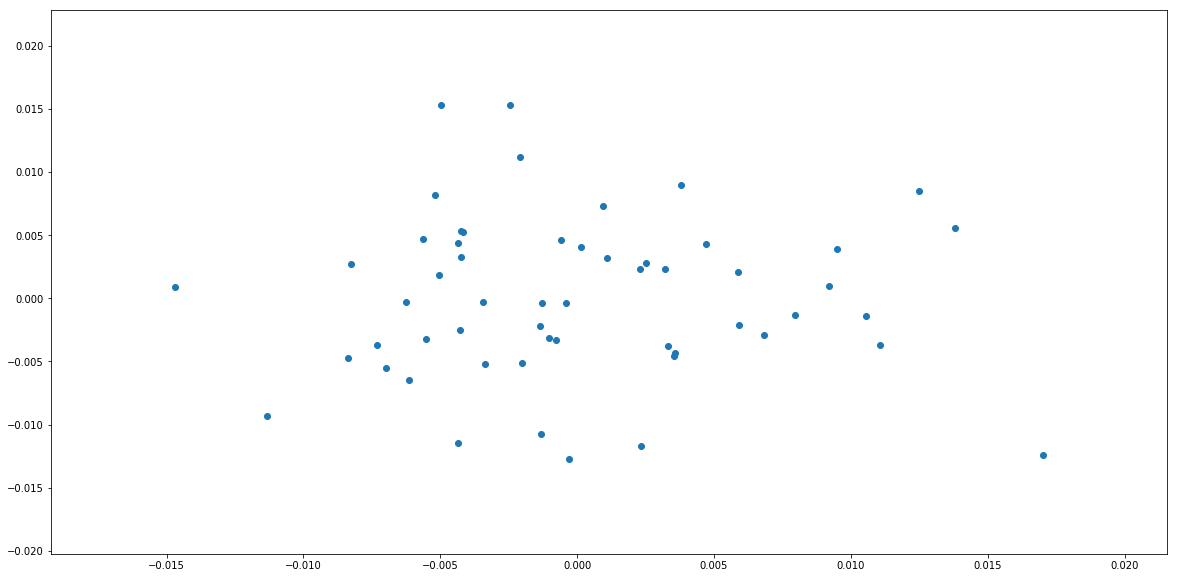

In [24]:
pyplot.scatter(points2D[:, 0], points2D[:,1])

Which word does a point represent? Let us tag them.

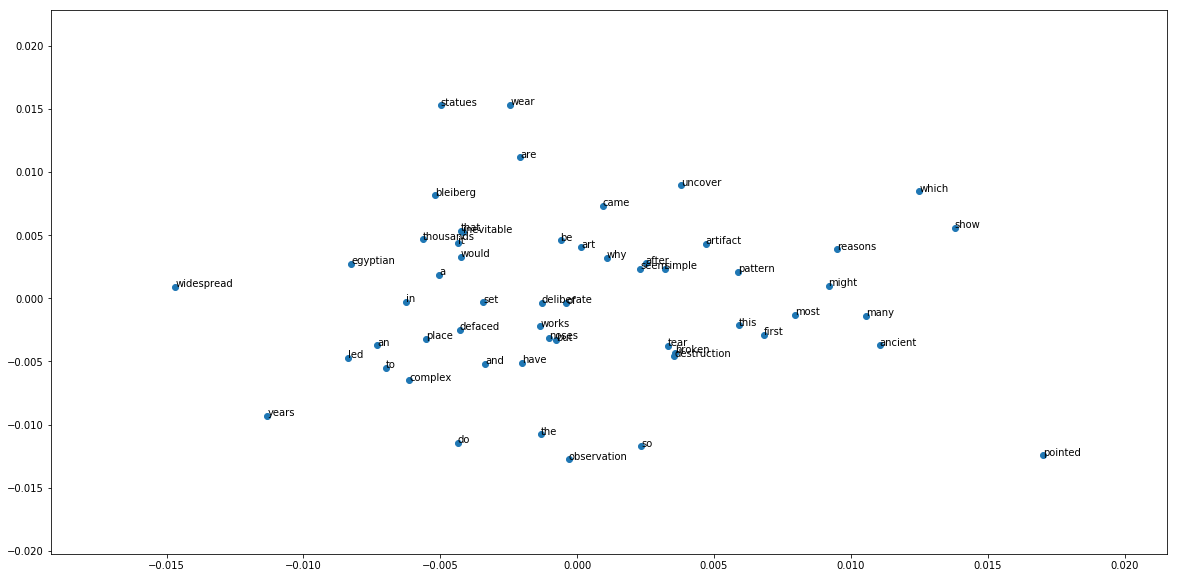

In [25]:
pyplot.scatter(points2D[:, 0], points2D[:,1])
for index, word in enumerate(words):
    pyplot.annotate(word, xy=(points2D[index,0], points2D[index,1]))

Now, let us a function which accepts a http address as input, extracts all the sentences (tagged by the `contextClass` in the webpage) from the webpage pointed by the address, computes word embeddings, and save them into an output file, plot the result with tagged words.
```
def computing_word2vec_in_webpage(httpAddress   = 'http://...', 
                              contextClass  = '',
                              outputW2VFile = '/home/user/.../w2vWeb.bin':
    
```
We decompose this process into four steps:
* extract the webpage pointed by the http address
* transform these texts into a list of sentences, each sentence is a list of tokens
* use gensim to train word embeddings
* save the result into output file, and plot


We use `urllib.request` pacakge to retrieve the webpage pointed by 'https://edition.cnn.com/style/article/egyptian-statues-broken-noses-artsy/index.html', and `BeautifulSoup` package to retrieve texts.

### note: make sure that your computer is allowed to access and retrieve webpages

In [26]:
import urllib

In [27]:
from bs4 import BeautifulSoup

In [28]:
webpage = ''
httpAddress = 'https://edition.cnn.com/style/article/egyptian-statues-broken-noses-artsy/index.html'
contextClass = 'Paragraph__component BasicArticle__paragraph BasicArticle__pad'
webpage = urllib.request.urlopen(httpAddress).read().decode('utf-8')

In [29]:
print(len(webpage))

165100


The value should not be 0. 

In [30]:
soup = BeautifulSoup(webpage, 'html.parser')
sections = [sec.text for sec in soup.find_all(class_= contextClass)]
corpora = " ".join(sections)

In [31]:
print(corpora)

Bleiberg, who oversees the museum's extensive holdings of Egyptian, Classical and ancient Near Eastern art, was surprised the first few times he heard this question. He had taken for granted that the sculptures were damaged; his training in Egyptology encouraged visualizing how a statue would look if it were still intact.  It might seem inevitable that after thousands of years, an ancient artifact would show wear and tear. But this simple observation led Bleiberg to uncover a widespread pattern of deliberate destruction, which pointed to a complex set of reasons why most works of Egyptian art came to be defaced in the first place. Bleiberg's research is now the basis of the poignant exhibition "Striking Power: Iconoclasm in Ancient Egypt." A selection of objects from the Brooklyn Museum's collection will travel to the Pulitzer Arts Foundation later this month under the co-direction of the latter's associate curator, Stephanie Weissberg. Pairing damaged statues and reliefs dating from t

Now, we will use NLTK tools to transform this text into a list of sentences, each sentence is a list of tokens.

In [32]:
import nltk
from nltk.tokenize import TweetTokenizer, sent_tokenize

In [33]:
tokenizer = TweetTokenizer()

In [34]:
inputCorpora = [tokenizer.tokenize(snt) for snt in nltk.sent_tokenize(corpora.lower())]

In [35]:
from pprint import pprint

In [36]:
pprint(inputCorpora)

[['bleiberg',
  ',',
  'who',
  'oversees',
  'the',
  "museum's",
  'extensive',
  'holdings',
  'of',
  'egyptian',
  ',',
  'classical',
  'and',
  'ancient',
  'near',
  'eastern',
  'art',
  ',',
  'was',
  'surprised',
  'the',
  'first',
  'few',
  'times',
  'he',
  'heard',
  'this',
  'question',
  '.'],
 ['he',
  'had',
  'taken',
  'for',
  'granted',
  'that',
  'the',
  'sculptures',
  'were',
  'damaged',
  ';',
  'his',
  'training',
  'in',
  'egyptology',
  'encouraged',
  'visualizing',
  'how',
  'a',
  'statue',
  'would',
  'look',
  'if',
  'it',
  'were',
  'still',
  'intact',
  '.'],
 ['it',
  'might',
  'seem',
  'inevitable',
  'that',
  'after',
  'thousands',
  'of',
  'years',
  ',',
  'an',
  'ancient',
  'artifact',
  'would',
  'show',
  'wear',
  'and',
  'tear',
  '.'],
 ['but',
  'this',
  'simple',
  'observation',
  'led',
  'bleiberg',
  'to',
  'uncover',
  'a',
  'widespread',
  'pattern',
  'of',
  'deliberate',
  'destruction',
  ',',
  'whic

  'what',
  'the',
  'proper',
  'narrative',
  'is',
  '.',
  '"'],
 ['perhaps',
  'we',
  'can',
  'learn',
  'from',
  'the',
  'pharaohs',
  ';',
  'how',
  'we',
  'choose',
  'to',
  'rewrite',
  'our',
  'national',
  'stories',
  'might',
  'just',
  'take',
  'a',
  'few',
  'acts',
  'of',
  'iconoclasm',
  '.'],
 ['"',
  'striking',
  'power',
  ':',
  'iconoclasm',
  'in',
  'ancient',
  'egypt',
  '"',
  'is',
  'on',
  'at',
  'the',
  'pulitzer',
  'arts',
  'foundation',
  'in',
  'st',
  'louis',
  ',',
  'missouri',
  ',',
  'from',
  'march',
  '22',
  'to',
  'aug',
  '.',
  '11',
  ',',
  '2019',
  '.']]


In [37]:
w2vModel = Word2Vec(inputCorpora, min_count=1)

In [38]:
print(w2vModel)

Word2Vec(vocab=632, size=100, alpha=0.025)


In [39]:
w2vModel.wv.most_similar('noses', topn=10)

[('deactivate', 0.27829426527023315),
 ('stability', 0.2747754156589508),
 ('imagistic', 0.22010895609855652),
 ('happened', 0.2191370129585266),
 ('god', 0.20695893466472626),
 ('offerings', 0.20412491261959076),
 ('concerned', 0.19963188469409943),
 ('trained', 0.19866549968719482),
 ('amun', 0.19662630558013916),
 ('your', 0.19620777666568756)]

Now, we can write up the function

In [40]:
def computing_word2vec_in_webpage(httpAddress   = 'http://...', 
                              contextClass  = 'p',
                              outputW2VFile = 'w2vWeb.bin'):
    # get raw corpus
    import urllib
    from bs4 import BeautifulSoup
    webpage = urllib.request.urlopen(httpAddress).read().decode('utf-8')
    soup = BeautifulSoup(webpage, 'html.parser')
    sections = [sec.text for sec in soup.find_all(class_= contextClass)]
    corpora = " ".join(sections)
    
    # pre-process raw corpus
    import nltk
    from nltk.tokenize import TweetTokenizer, sent_tokenize
    tokenizer = TweetTokenizer()
    inputCorpora = [tokenizer.tokenize(snt) for snt in nltk.sent_tokenize(corpora.lower())]
    
    # the main machine learning process
    from gensim.models import Word2Vec
    w2vModel = Word2Vec(inputCorpora, min_count=1)
    print(w2vModel)
    
    # save result
    w2vModel.save(outputW2VFile)
    
    # visualize result
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    points2D = pca.fit_transform(w2vModel.wv[w2vModel.wv.vocab])
    import matplotlib
    matplotlib.rcParams['figure.figsize'] = [20, 10]
    from matplotlib import pyplot
    pyplot.scatter(points2D[:, 0], points2D[:,1])
    pyplot.scatter(points2D[:, 0], points2D[:,1])
    for index, word in enumerate(words):
        pyplot.annotate(word, xy=(points2D[index,0], points2D[index,1]))
    
    
                              

Word2Vec(vocab=632, size=100, alpha=0.025)


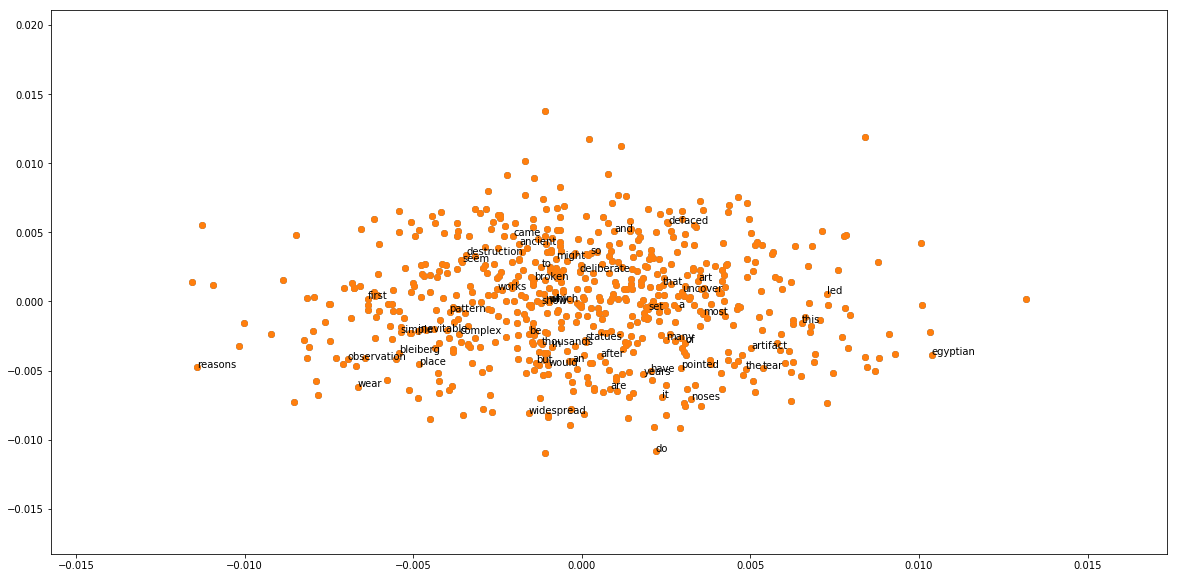

In [41]:
computing_word2vec_in_webpage(httpAddress = 'https://edition.cnn.com/style/article/egyptian-statues-broken-noses-artsy/index.html',
                              contextClass = 'Paragraph__component BasicArticle__paragraph BasicArticle__pad',
                              outputW2VFile = 'w2vEgyptianBrokenBoses.bin')                          


# References

* Tomas Mikolov, Kai Chen, Greg Corrado,Jeffrey Dean (2013). Efficient Estimation of Word Representations in Vector Space. CoRR:abs/1301.3781. <a>http://arxiv.org/abs/1301.3781</a> 
* Jeffrey Pennington, Richard Socher,d Christopher D. Manning (2014). GloVe: Global Vectors for Word Representation. EMNLP-14. <a>https://nlp.stanford.edu/projects/glove/</a>
* Omer Levy and Yoav Goldberg (2014). Dependency-Based Word Embeddings. ACL-14. <a>https://levyomer.wordpress.com/2014/04/25/dependency-based-word-embeddings/2</a>

<p style="background-color:#66A5D1;padding-top:0.2em;padding-bottom: 0.2em" />

<table style="width:100%">
  <tr>
      <td colspan="1" style="text-align:left;background-color:#0071BD;color:white">
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">
            <img alt="Creative Commons License" style="border-width:0;float:left;padding-right:10pt"
                 src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" />
        </a>
        &copy; T. Dong, C. Bauckhage<br/>
        Licensed under a 
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/" style="color:white">
            CC BY-NC 4.0
        </a>.
      </td>
      <td colspan="2" style="text-align:left;background-color:#66A5D1">
          <b>Acknowledgments:</b>
          This material was prepared within the project
          <a href="http://www.b-it-center.de/b-it-programmes/teaching-material/p3ml/" style="color:black">
              P3ML
          </a> 
          which is funded by the Ministry of Education and Research of Germany (BMBF)
          under grant number 01/S17064. The authors gratefully acknowledge this support.
      </td>
  </tr>
</table>